# Data Processing 

## Importing libraries and reading the data

In [69]:
import numpy as np 
import pandas as pd 

import ast

import matplotlib.pyplot as plt
import seaborn as sns 

In [70]:
df_movies = pd.read_csv("tmdb_movies_dataset.csv")
df_movies.head()

,title,year,country,genres,director,cast,overview
0,Sunset Boulevard,1950,['United States of America'],['Drama'],Billy Wilder,"['William Holden', 'Gloria Swanson', 'Erich vo...",A hack screenwriter writes a screenplay for a ...
1,All About Eve,1950,['United States of America'],['Drama'],Joseph L. Mankiewicz,"['Bette Davis', 'Anne Baxter', 'George Sanders...",From the moment she glimpses her idol at the s...
2,Rashomon,1950,['Japan'],"['Crime', 'Drama', 'Mystery']",Akira Kurosawa,"['Toshirō Mifune', 'Machiko Kyō', 'Takashi Shi...",Four people recount different versions of the ...
3,Cinderella,1950,['United States of America'],"['Family', 'Fantasy', 'Animation', 'Romance']",Clyde Geronimi,"['Ilene Woods', 'Eleanor Audley', 'Verna Felto...",Cinderella has faith her dreams of a better li...
4,Strangers on a Train,1951,['United States of America'],"['Crime', 'Thriller']",Alfred Hitchcock,"['Farley Granger', 'Ruth Roman', 'Robert Walke...",A charming psychopath tries to coerce a tennis...


## Feature Exploration

In [71]:
df_movies.shape

(3515, 7)

In [72]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     3515 non-null   object
 1   year      3515 non-null   int64 
 2   country   3515 non-null   object
 3   genres    3515 non-null   object
 4   director  3515 non-null   object
 5   cast      3515 non-null   object
 6   overview  3515 non-null   object
dtypes: int64(1), object(6)
memory usage: 192.4+ KB


In [73]:
# Convert strings to lists 
df_movies['genres'] = df_movies['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_movies['country'] = df_movies['country'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_movies['cast'] = df_movies['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_movies

,title,year,country,genres,director,cast,overview
0,Sunset Boulevard,1950,[United States of America],[Drama],Billy Wilder,"[William Holden, Gloria Swanson, Erich von Str...",A hack screenwriter writes a screenplay for a ...
1,All About Eve,1950,[United States of America],[Drama],Joseph L. Mankiewicz,"[Bette Davis, Anne Baxter, George Sanders, Cel...",From the moment she glimpses her idol at the s...
2,Rashomon,1950,[Japan],"[Crime, Drama, Mystery]",Akira Kurosawa,"[Toshirō Mifune, Machiko Kyō, Takashi Shimura,...",Four people recount different versions of the ...
3,Cinderella,1950,[United States of America],"[Family, Fantasy, Animation, Romance]",Clyde Geronimi,"[Ilene Woods, Eleanor Audley, Verna Felton, Cl...",Cinderella has faith her dreams of a better li...
4,Strangers on a Train,1951,[United States of America],"[Crime, Thriller]",Alfred Hitchcock,"[Farley Granger, Ruth Roman, Robert Walker, Le...",A charming psychopath tries to coerce a tennis...
...,...,...,...,...,...,...,...
3510,The Crow,2024,"[France, Germany, United Kingdom, United State...","[Action, Fantasy, Horror]",Rupert Sanders,"[Bill Skarsgård, FKA twigs, Danny Huston, Jose...",Soulmates Eric and Shelly are brutally murdere...
3511,Borderlands,2024,"[United States of America, Luxembourg]","[Action, Science Fiction, Comedy]",Eli Roth,"[Cate Blanchett, Kevin Hart, Edgar Ramírez, Ja...","Returning to her home planet, an infamous boun..."
3512,The Platform 2,2024,[Spain],"[Science Fiction, Horror, Thriller]",Galder Gaztelu-Urrutia,"[Milena Smit, Hovik Keuchkerian, Natalia Tena,...",After a mysterious leader imposes his law in a...
3513,Joker: Folie à Deux,2024,[United States of America],"[Drama, Crime, Thriller]",Todd Phillips,"[Joaquin Phoenix, Lady Gaga, Brendan Gleeson, ...","While struggling with his dual identity, Arthu..."


### Years

/tmp/ipykernel_43639/2697366128.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, palette=colors)


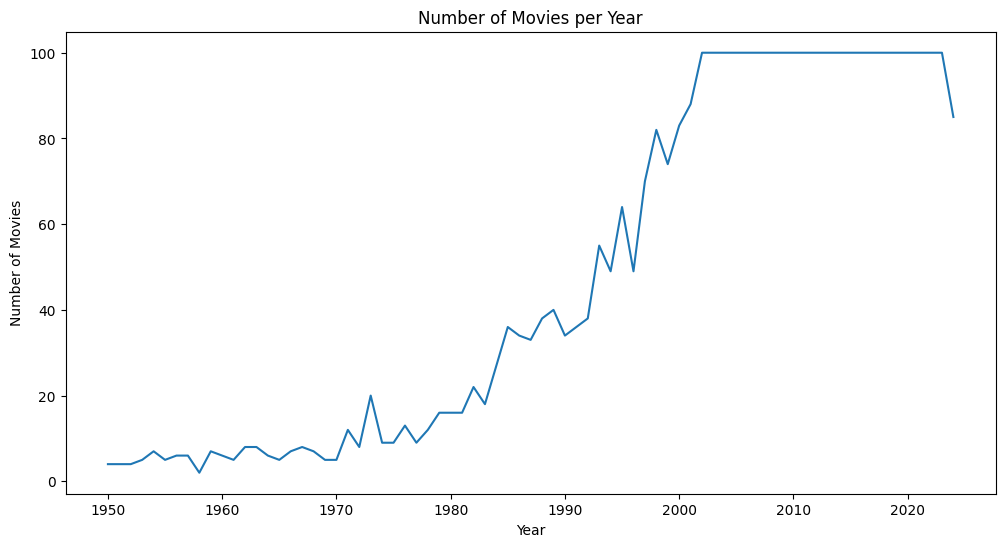

In [83]:
# Movies per year
movies_per_year = df_movies['year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, palette=colors)
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

### Genres

In [75]:
# Now explode
df_exploded_genres = df_movies.explode('genres')

# Check the result
print(df_exploded_genres[['title','genres']].head(10))

                  title     genres
0      Sunset Boulevard      Drama
1         All About Eve      Drama
2              Rashomon      Crime
2              Rashomon      Drama
2              Rashomon    Mystery
3            Cinderella     Family
3            Cinderella    Fantasy
3            Cinderella  Animation
3            Cinderella    Romance
4  Strangers on a Train      Crime


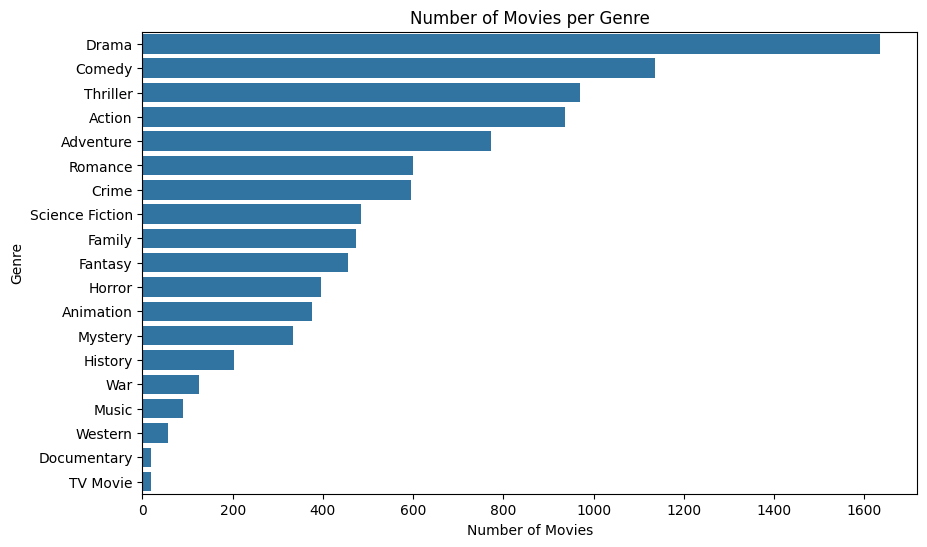

In [84]:
genre_counts = df_exploded_genres['genres'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Number of Movies per Genre")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

### Countries

In [85]:
# Explode the df
df_exploded_country = df_movies.explode('country')

# Check the result
print(df_exploded_country[['title','country']].head(10))

                           title                   country
0               Sunset Boulevard  United States of America
1                  All About Eve  United States of America
2                       Rashomon                     Japan
3                     Cinderella  United States of America
4           Strangers on a Train  United States of America
5       A Streetcar Named Desire  United States of America
6  The Day the Earth Stood Still  United States of America
7            Alice in Wonderland  United States of America
8                          Ikiru                     Japan
9            Singin' in the Rain  United States of America


In [78]:
# Removing outliers 
country_counts = df_exploded_country['country'].value_counts()
country_counts_filtered = country_counts[country_counts > 5]
country_counts_filtered



country
United States of America    2942
United Kingdom               610
France                       339
Germany                      235
Canada                       166
Japan                        125
Italy                        111
Spain                         71
Australia                     69
China                         53
Hong Kong                     51
Belgium                       48
Ireland                       36
South Korea                   36
Sweden                        34
Denmark                       29
India                         29
Switzerland                   23
Mexico                        21
New Zealand                   21
Netherlands                   20
Poland                        16
Brazil                        14
Austria                       14
Luxembourg                    13
Czech Republic                13
Norway                        12
United Arab Emirates          11
Finland                        9
Hungary                        8
Ic

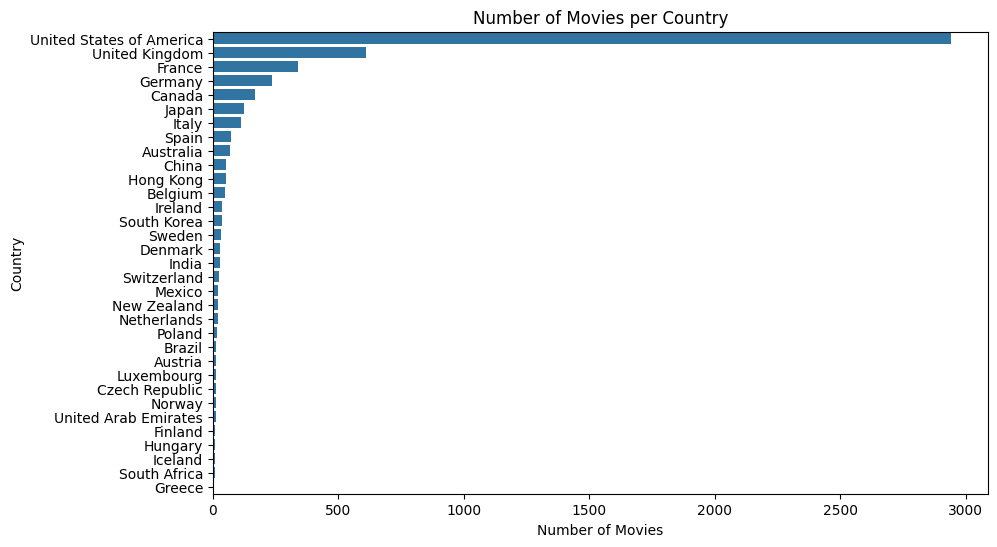

In [79]:
country_counts = df_exploded_country['country'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts_filtered.values, y=country_counts_filtered.index)
plt.title("Number of Movies per Country")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()

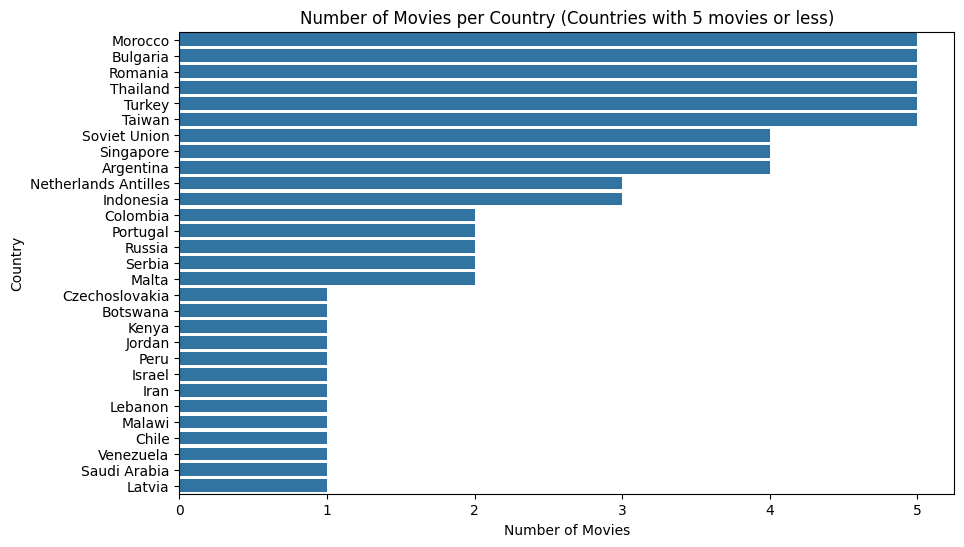

In [80]:
# Plotting the outliers 
country_counts_outliers = country_counts[country_counts < 6]

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts_outliers.values, y=country_counts_outliers.index)
plt.title("Number of Movies per Country (Countries with 5 movies or less)")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()


### Cast

In [87]:
# Explode df
df_exploded_cast = df_movies.explode('cast')

# Check the result
print(df_exploded_cast[['title','cast']].head(10))

# Count movies per actor 
cast_counts = df_exploded_cast['cast'].value_counts()

              title                cast
0  Sunset Boulevard      William Holden
0  Sunset Boulevard      Gloria Swanson
0  Sunset Boulevard  Erich von Stroheim
0  Sunset Boulevard         Nancy Olson
0  Sunset Boulevard          Fred Clark
1     All About Eve         Bette Davis
1     All About Eve         Anne Baxter
1     All About Eve      George Sanders
1     All About Eve        Celeste Holm
1     All About Eve        Gary Merrill


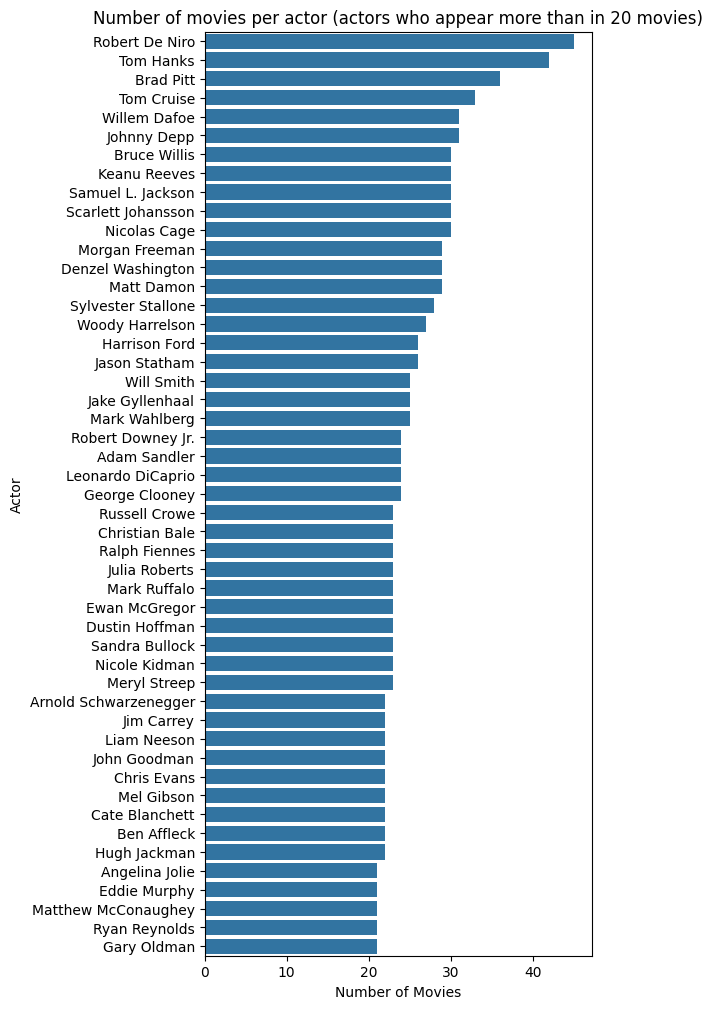

In [95]:
# Plot the actors who appear in the biggest number of movies 
top_actors = cast_counts[cast_counts > 20]

plt.figure(figsize=(5,12))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title("Number of movies per actor (actors who appear more than in 20 movies)")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.show()



### Directors

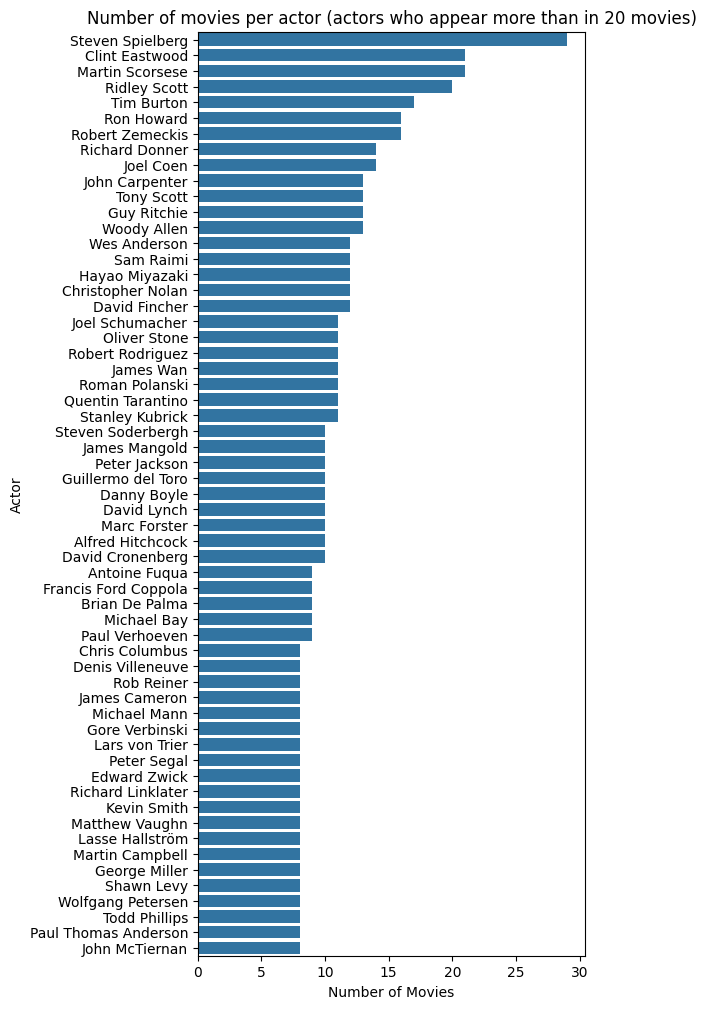

In [102]:
director_counts = df_movies['director'].value_counts()
top_directors = director_counts[director_counts>7]

plt.figure(figsize=(5,12))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Number of movies per actor (actors who appear more than in 20 movies)")
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.show()

## Overview Analysis (NLP)